<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_SQL_Etapas_de_um_Projeto_Data_Warehouse_e_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Etapas de um Projeto - Data Warehouse e Dashboard</b></font>

<a href="https://cursos.alura.com.br/course/google-big-query-data-studio-projeto-final"><font size=2; color=gray>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/bigquery-manipulacao-dados><font size=2 color=gray>Google BigQuery e Data Studio: projeto final</a>
<li>Carga Horária: 20 h
<li>Instrutora: Victorino Vila
<li>Data de Início: 11-2022
</ul>


Este caderno contém algumas anotações sobre o desenvolvimento completo de um Data Warehouse e um Dashboard para analisar dados de um empreendimento.

O projeto é a simulação do gerenciamento de uma escola, com diversos usuários produzindo dados que deverão ser armazenados em um banco de dados transasionais (MySQL). Tendo este banco de dados, eles serão carregados em um Data Warehouse do Big Query. Para consultar e sintetizar os dados. A finalização será realizada com a automatização de alguns processos.

A parte de criação de dashboard está em [outro aquivo](https://colab.research.google.com/drive/1hTRrI_TTv3ayOoYbJV_jC_Nthexl4jP2?usp=sharing).

* [Curso básico de SQL - Programação dinâmica](https://www.youtube.com/watch?v=BRPUA0EgS4I&list=PL5TJqBvpXQv5n1N15kcK1m9oKJm_cv-m6)
* Fazer um teste da implementação com o SQLite e Python, para exemplificar a lógica da construção do Data Warehouse

## <font color=orange><b>Conteúdo</b></font>

* <font color=orange>Conceitos</font>
    * Ambiente nuvem
    * ETL - ELT
    * Data Warehouse (DW) desnormalizada
    * Workflow de criação de um DW na Cloud


* Acesso dos dados diretamente de uma base de dados MySQL
* Construção de um abiente MySQL na nuvem
* Construção de um banco de dados no Big Query
* Construção de um projeto de Business Intelligence desde a criação do Data Warehouse até a construção dos Dashbaords
* Como visões lógicas e materializadas ajudam na construção de relatórios
* Use consultas parametrizadas

## <font color=orange><b>Resumo</b></font>

1. <font color=orange><b>Ambiente de desenvolvimento</b></font>
    1. Projeto no Google Cloud Console
    2. Instância do MySQL na Cloud
    3. SGBD na máquina local
    4. IP de segurança
        * IP de segurança: local - Google Cloud SQL
        * Porta intaância MySQL - BigQuery
        * Usuários autorizados
2. <font color=orange><b>Tabelas de Stage</b></font>
    * ELT: extração dos dados das tabelas externas (instância MySQL) para o Big Query
3. <font color=orange><b>Estruturação do Data Warehouse</b></font>
    * União de tabelas (tabela única desnormalizada)
    * Definição da unidade de registros
    * Estrutaração do DW



# <font color=orange><b>CURSO</b></font>


## <font color=orange><b>Ambiente de Desenvolvimento</b></font>

O ambiente de desenvolvimento é o conjunto de ferramentas necessárias para a criação e execução dos códigos de programação.

1. Conta Google
2. Projeto no Google Console
    - Conta de faturamento
3. G Cloud SQL: Instância do MySQL na nuvem Google
4. Ambiente MySQL local
5. Registro de IP de segurança
6. Porta interna do Google Cloud: conexão entre BigQuery e Google SQL MySQL
7. Usuários compartilhados
8. Consulta com dados externos
9. Carga dos dados transacionais

Uma alternativa deste sistema é criar somente o API do BigQuery (acesso remoto) para fazer a gestão do banco de dados. Desta maneira, será dispensada o uso do Google Cloud SQL, recurso este que não é de uso gratuíto.

3. **Chave de Segurança** (JSON)
4. **Acesso remoto**: gerenciamento através de linguagens programáticas.
    - Carga
    - Transformação
    - Consultas

- GOOGLE CLOUD STORAGE: armazenamento remoto de dados para acesso em qualquer lugar.
- ClOUD SQL: serviço de banco de dados relacional gerenciado para MySQL, Postgres etc.
    - Este não é recurso gratuíto e não possui limites mínimos de utilização.
    - Ela é ótima estratégia para fazer a migração de dados para o Cloud do Google.


<font color=orange><b>Estratégias de Ambientes de Desenvolvimento</b></font>

* <font color=orange><b>A.</b>  Poucos dados [até 1 GB; até 20K ou 1M de linhas]</font>: Pandas
    * <font color=orange><b>A.1.</b></font> CSV → Pandas
* <font color=orange><b>B.</b>  Muitos dados [de 1 GB até 100 GB]</font>: SGBD (Big Query, PostgreSQL, MySQL, MongoDB etc)
    * <font color=orange><b>B.1.</b></font> CSV → BD → Consulta (amostragem, seleção) → Pandas (Python)
    * <font color=orange><b>B.2.</b></font> CSV → BD → Resumos, Operações espaciais e transformações (PostGIS, BigQuery, Postgres etc)
* <font color=orange><b><i>C.</b>  Big data [> 100 GB, streaming]</i></font>: processamento distribuído, como o Spark, Dask ou Hadoop
    * <font color=orange><b>C.1.</b></font> CSV, DB → Spark → PySpark (análise de dados, ML)
    * <font color=orange><b>C.2.</b></font> CSV, DB → Spark → amostra → Pandas (análise de dados, ML)


### <font color=orange>1 - Conta Google</font>



* baliu.fiamenghi.2022
* Sen2345.1-

### <font color=orange>2 - Projeto Google Cloud Console</font>

Um projeto no Google é um agregador de recursos. Uma conta pode ter diversos projetos geridos por ele.

1. A primeira coisa é acessar o [Console do Google Cloud](https://console.cloud.google.com/?hl=pt-br).
2. Criar um novo projeto: `Selecionar Projeto > Novo Projeto...`
3. Conta de Faturamento: ela é necessária para poder usar diversos recursos do Google.
    - `Faturamento`
    - Preencher os dados para o cartão

### <font color=orange>3 - Google Cloud SQL</font>

Este recurso permite criar uma instância de um banco de dados de forma remota, a ser gerenciado por um SGBD. Nesta solução será criado um banco de dados transacional para o empreendimento no sistema MySQL. Este poderá ser gerenciado pelo MySQL Workbench na máquina local.

Este não é recurso gratuíto e não possui limites mínimos de utilização.

Ela é ótima estratégia para fazer a migração de dados para o Cloud do Google.

1. **Nova Instância**: `Barra de Produtos > SQL`
2. **Mecanismo de Banco de Dados**: escolher entre MySQL, Postgres, SQL Server.
3. **API Compute Engine**: para os recursos possam se comunicar entre si é necessário ativar as APIs.
    - Nome do BD
    - Senha do root (será usada na configuração de IP`de segurança)
    - MySQL 8.0
    - Região: southamerica-east1 (São Paulo)

### <font color=orange>4 - Ambiente local MySQL</font>



#### **SGBD**

O Sistema de Gestão de Banco de Dados é uma estrutura que permite acessar e manipular bancos de dados. A gestão dos bancos pode ser feita através da interface da linha de comando (CMD) ou através de interfaces gráficas como o MySQL Workbench ou o pgAdmin (que é aplicação baseada em Web).





#### **DOCKER**

[Roteiro de Docker](https://colab.research.google.com/drive/1lsG23dBUCgiihwTAnPbk9whoHtOi6xvg?authuser=1#scrollTo=CE-cLSiBIueJ)

Através do Docker podemos criar um ambiente local MySQL. Isso é muito útil quando:
- há a troca constante de projetos;
- projeto com múltiplos bancos de dados;
- processo mais simples de instalação
- execução mais leve

Isso permite escolher qual banco de dados no momento de forma prática e simples.

1. Docker na máquina
    - Verificar se não há nada rodando: `docker ps`
2. Novo projeto
    - `docker run --name mariadb-video -p 3306:3306 (porta padrão do MySQL) -e MYSQL_ROOT_PASSWORD=senhaparaacessar -d (rodar em segundo plano) mariadb:latest`
3. Finalizar
    - `docker stop mariadb-video`
4. Abrir projeto
    - `docker start mariadb-video`

---

*  Criação de um container definindo as credenciais do administrador do SGBD;
* Muitos containers são criados seguindo configurações default, com os arquivos de dados permanecendo dentro dos mesmos. Uma eventual falha/inoperância no container (ou até uma exclusão acidental do mesmo) resultará em perda de informações. Logo, a criação de um volume mapeando os dados para fora do container (no caso um diretório da máquina em que se executa o Docker) é outra questão importante a considerar sempre ([veja mais](https://imasters.com.br/back-end/docker-bancos-relacionais-cuidados-importantes-na-criacao-de-containers));

- [Referencia](https://www.youtube.com/watch?v=oqB35DeNw_c)
- [Como rodar MySQL com Docker no Windows](https://www.youtube.com/watch?v=S9BbUxmFaQI)
- [docker e postgres no windows](https://www.google.com/search?q=docker+e+postgres+no+windows&oq=docker+e+postgres+no+windows&aqs=chrome..69i57j0i22i30l3.10694j0j4&sourceid=chrome&ie=UTF-8)
- [Como instalar o PostgreSQL e phpPgAdmin no Docker](https://www.youtube.com/watch?v=dReXLdeBmwc)

### <font color=orange>5 - IP de Segurança</font>

A estrutura do ambiente do projeto é um banco de dados MySQL que se encontra na nuvem, no Google Cloud. No local temos o gerenciador. Este deseja se comunicar com o banco de dados remoto. Para isso é preciso configurar a camada de proteção. Isso é feito através da configuração de um IP.

1. Google Cloud > SQL > Visão Geral da Instância
2. IP da máquina local
    - http://ipv4.whatismyv6.com
3. Configuração das conexões seguras
    - \> Conexões
    - IP Público marcada
    - Adicionar Rede
4. Conexão no Workbench
    1. MySQL Connections + > New...
    2. Nome
    3. IP remoto (nuvem Google)
        - Visão Geral > Conectar-se à instância...
        - Copiar IP Público
    4. Nome: root
    5. Senha: Store in vault 
        - Senha usada na criação da instância


### <font color=orange>6 - Porta Google Cloud: MySQL e BigQuery</font>



É necessário criar a porta de conexão entre o ambiente do Big Quey e o banco MySQL que está no ambiente Google Cloud SQL. 

Apesar de estarem tudo no mesmo ambiente será através de uma API específica (BigQuery Connection API) que o BigQuery irá conseguir se comunicar com o banco de dados MySQL dentro da nuvem.

1. **Painel BigQuery**: `Menu > Big Data > Big Query`
2. **Conjunto de Dado**: criar um novo conjunto de para o DW (BitbyteDW)
    * `Local`: mesma região do banco de dados MySQL
3. **API de conexão**: `Menu > API e Serviços > Bibliotecas... > BigQuery Cpnnection API`
4. **Adicionar dados externos**: `Painel BigQuery > Explorer > + add data > Conexão com fontes de dados externas...`
    * Código da conexão: Banco-Bitbyte
    * `Local`: mesma região do banco de dados MySQL
    * Nome da conexão do Cloud SQL
        * Painel SQL > Nome da conexão...


### <font color=orange>7 - Compartilhar usuário</font>



1. Painel BigQuery: Abrir a conexão com o conjunto de dados externos
2. Compartilhar ...
    * Adicionar membro
    * Papel > BigQuery Connection Admin

### <font color=orange>8 - Teste de consulta</font>



A tabela quando é externa deve seguir o padrão: `EXTERNAL_QUERY(tabela_externa, consulta_SQL)`.

```sql
SELECT * 
FROM EXTERNAL_QUERY('projects/projeto-final-bq-ds-369013/locations/southamerica-east1/connections/Banco-Bitbyte',
"SELECT * FROM curso WHERE periodo_id = '2015.1';")
```

ou 

```sql
SELECT * 
FROM EXTERNAL_QUERY("projeto-final-bq-ds-369013.southamerica-east1.Banco-Bitbyte",
"SELECT * FROM curso WHERE periodo_id = '2015.1';")
```

## <font color=orange><b>Data Warehouse</b></font>

O Data Warehouse (Data Analytics Warehouse) é uma estratégia de armazenamento dos dados gerenciais, diferenciando-se do banco de dados transacionais, que são importantes para o funciomento cotidiano dos sistemas. O banco de dados gerenciais são destinados a centralizar os dados de distintos sistemas e padronizá-los com a visão do todo.

A separação desses bancos de dados é importante para permitir maior flexibilidade na operação deles.


### <font color=orange>ETL - ELT</font>

São estratégias de transferencias de dados entre sistemas.

EXTRACT - TRANSFORM - LOAD

O <font color=orange><b>ETL</b></font> refere-se ao processo de ingestão dos dados dos bancos transacionais aos bancos de dados gerenciais. Consiste em acessar os dados em sistemas e locais diversos, transformá-los segundo as especificações de padronização e carregá-los nos BD gerenciais. Este processo pode ser realizado por software específicos ou script.

O <font color=orange><b>ELT</b></font> é uma concepção para o ETL. Com a tranformação digital recente, como o surgimento do big data e ao mesmo tempo com o barateamento do armazenamento de dados com as nuvens, o processo de transformação se tornou um empecilho na eficiência do processo. Então esta estratégia propõe que todos sejam carregados no Data Warehouse para só depois serem transformados. É uma estratégia relativamente recente e ainda está sendo testada para avaliar a sua real vantagem

Os sistemas de big data e o Google Big Query possibilitam a execução do ELT. 

<h3><font color=orange>FERRAMENTAS DE ETL</font></h3>

* <font color=orange>Apache Airflow</font>: não é tecnicamente uma ferramenta de ETL, mas permite gerenciar e organizar os fluxos de ETL. Ele é destiando para processos de ETL de muitas etapas ou longos. Não é tão eficiente para projeto de ETl curtos.
* <font color=orange>Luigi</font>: também é uma ferramenta Open-Source. Ela é destinada para projetos mais simples.
* <font color=orange>Pandas</font>: é uma solução para a extração, limpeza e transformação dos dados. No entanto, ela possui limitações em relação à escalabilidade e consumo de memória.
* <font color=orange>PETL</font>: Solução parecida com o Pandas, mas permite maior escalabilidade. "The best use case for using petl is when you want the basics of ETL without the Analytics and the job is not time-sensitive."
* <font color=orange>PySpark</font>: 
* <font color=orange>Hevo</font>: solução no-code para ETL.

### <font color=orange>Data Warehouse Desnormalizado</font>

Os Data warehouses tradicionais costumam ser bancos de dados normalizados, com o objetivo de otimizar o espaço consumido por eles, ou para melhorar a performance dos processos. As principais modelos são o Snowflake e o estrela. Um conjunto de tabelas dimensão conectadas através da Tabela Fato.

Já no Google Big Query, os bancos de dados podem ser desnormalizados, onde a redudância não é um problema, com repetição dos descritores e a presença de todas as combinações possíveis em uma grande tabela. Isso é garantido por ele operar com uma estratégia de processamento *colunar*. Isso possibilita um **ganho de performance**.

Assim todos as colunas são carregadas em uma única tabela.



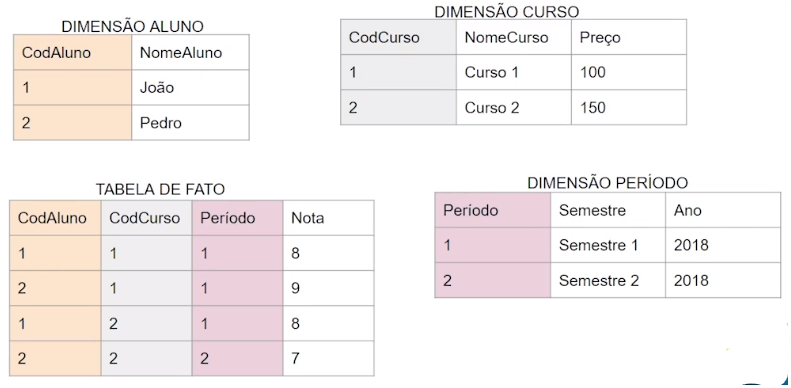

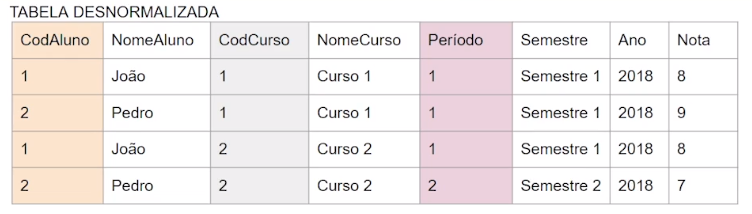

### <font color=orange>Workflow de DW</font>

1. Entender o funcionamento do empreendimento
    - Entender como são as tabelas no modelo transacional.
    - Identificar as conexões entre tabelas 
2. Identificar os campos para a tomada de decisão
    - Quais campos serão úteis para a ação gerencial
3. ETL e ELT
    1. Stage: Transposição de dados externos para tabelas do BigQuery (extract and load)
4. Junção de todas as tabelas
    * Seleção dos campos que interessam para o DW
5. Consolidação do scrit do DW

Um banco de dadas bem projeto permite a facil identificação dos campos e como as tabelas se conectam.

> Como a relação entre Aluno e Curso é de N:M temos que ter, obrigatoriamente, uma tabela intermediária ligando estas duas.

* Cada registro no DW representa um evento do último `n` da sequência de relações. Neste caso, cada linha representará uma resposta de um exercício.
* Normalmente é realizado o agrupamento e a síntese dos dados, para mudar a representação dos registros e apresentar os dados como informações resumidas.



---



### <font color=orange>1. Construção do DW</font>


#### <font color=orange>2. Recuperar banco de dados transacional</font>

Esta etapa consiste em ter acesso do banco de dados transacionais (conjunto de tabelas do sistema do dia-a-dia do emprendimento). Para isso, pode ser feito a recuperação do banco de dados, ou a conexão a ele.

No *MySQL Workbench*:

1. Criar Schema (Banco de dados)
    - Definir nome
    - `CREATE SCHEMA 'BitByte';` > Apply
2. Recuperando a base de dados
    - File > Open SQL Script

#### <font color=orange>3.a. STAGE: Criação de tabelas</font>

Nesta etapa deverão ser criadas no BigQuery as mesmas tabelas do MySQL, este conjunto é chamado de Stage.

* Os nomes das tabelas serão iguais
* Os nomes dos campos serão iguais
* Os tipos de dados exigirá a conversão

**MySQL WORKBENCH**

Para criar as tabelas no BigQuery é preciso ter o script de criação das tabelas. Uma estratégia de agilizar este processo é através da obtenção pelo próprio SGBD. Para obter o script de uma tabela (o script que criaria a tabela já existente):

1. Crie uma nova consulta
2. **Script da tabela**: `Sobre a tabela > Right-click > Sendo to SQL Editor > Create Statement...`
3. Remover toda informação após o tipo de dado de cada campos
4. Apagar informação de `primary key`.
5. Substituir a crase (`) por vazio. Ela é usada para fixar o nome de campos
6. Adicionar `drop table if exists '<nome do projeto>.<nome do dataset>.<nome da tabela>';`

**Compatibilização dos tipos de dados MySQL e BigQuery**

* int(11) → INT64
* varchar(255) → STRING
* float → FLOAT64
* datetime → DATETIME

Deverá ficar desta forma:

```sql
-- Script de criação de tabela
DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.aluno`;

CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.aluno` (
  id INT64 ,
  nome STRING ,
  email STRING
) ;
```

* As tabelas no BigQuery não possuem chave primária. Isso pode causar a importanção duplicada de dados. Por isso é importante remover dados já existentes para garantir a unicidade dos dados. 
* Para não remover a tabela toda, pode-se restringir a um período de interesse.

```sql
-- Criação das tabelas de stage
DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.aluno`;
CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.aluno` (
  id INT64 ,
  nome STRING ,
  email STRING
) ;

DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.curso`;
CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.curso` (
  id INT64 ,
  nome STRING ,
  semestre STRING,
  ano STRING ,
  periodo_id STRING ,
  preco FLOAT64
) ;

DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.exercicio`;
CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.exercicio` (
  id INT64 ,
  secao_id INT64 ,
  pergunta STRING ,
  resposta_oficial STRING ,
  periodo_id STRING
) ;

DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.matricula`;
CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.matricula` (
  id INT64 ,
  aluno_id INT64 ,
  curso_id INT64 ,
  data DATETIME ,
  tipo STRING ,
  periodo_id STRING
);

DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.nota`;
CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.nota` (
  id INT64 ,
  resposta_id INT64 ,
  nota FLOAT64 ,
  periodo_id STRING 
) ;

DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.resposta`;
CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.resposta` (
  id INT64 ,
  exercicio_id INT64 ,
  aluno_id INT64,
  resposta_dada STRING ,
  periodo_id STRING
) ;

DROP TABLE IF EXISTS `projeto-final-bq-ds-369013.BitbyteDW.secao`;
CREATE TABLE `projeto-final-bq-ds-369013.BitbyteDW.secao` (
  id INT64 ,
  curso_id INT64 ,
  titulo STRING ,
  explicacao STRING ,
  numero INT64 ,
  periodo_id STRING
) ;
```

#### <font color=orange>3.b. Extract and Load - Cargas de dados</font>

Para a transposição dos dados das tabelas externas para as tabelas dentro do BigQuery precisamos fazer um script.

* Uma das demandas é ter maior controle dos períodos trabalhados, então todas as operações deverão ser baseadas pelo PERÍODO.
* Isso garante evitar dados duplicados e melhorar a eficiência da transformação.

```sql
-- Seleção dos valores de período
SELECT DISTINCT periodo_id FROM cursos;
```

**Padrão de carga de dados externos para tabelas de stage**



```sql
-- Remove dados antigos, impedindo a repetição de dados
DELETE FROM `projeto-final-bq-ds-369013.BitbyteDW.curso`
    WHERE periodo_id = '2010.1';

-- Transposição de dados MySQL → BigQuery (Extract and Load)
INSERT INTO `projeto-final-bq-ds-369013.BitbyteDW.curso`
    SELECT * FROM EXTERNAL_QUERY('projects/projeto-final-bq-ds-369013/locations/southamerica-east1/connections/Banco-Bitbyte',
    "SELECT * FROM curso WHERE periodo_id = '2010.1';")

```

Aplicação em todas as tabelas do case:

```sql
-- Extract and Load das tabelas
-- EXERCICIO
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
WHERE periodo_id = '2010.1';

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM exercicio WHERE periodo_id = '2010.1';");

-- MATRICULA
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.matricula`
WHERE periodo_id = '2010.1';

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.matricula`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM matricula WHERE periodo_id = '2010.1';");

-- NOTA
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.nota`
WHERE periodo_id = '2010.1';

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.nota`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM nota WHERE periodo_id = '2010.1';");

-- RESPOSTA
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.resposta`
WHERE periodo_id = '2010.1';

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.resposta`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM resposta WHERE periodo_id = '2010.1';");

-- SECAO
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.secao`
WHERE periodo_id = '2010.1';

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.secao`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM secao WHERE periodo_id = '2010.1';");
```

**TABELA ALUNOS**

A **tabela alunos** não possue o campo de período.

> A relação entre a tabela aluno e curso é do tipo de 1:n, pois ele pode se matricular em diversos cursos, possuindo várias matrículas.

```sql
-- Carga de dados - Aluno
SELECT aluno.*
FROM aluno
INNER JOIN matricula
ON aluno.id = matricula.aluno_id
WHERE matricula.periodo_id = '2010.1';
```

Devido a característica da associação 1:n, com `inner join` serão retornados registros repetidos de alunos, mas de matrículas diferentes. Para evitar isso usar o `DISTINCT`.

```sql
-- Carga de dados - Aluno
SELECT DISTINCT aluno.*
FROM aluno
INNER JOIN matricula
    ON aluno.id = matricula.aluno_id
WHERE matricula.periodo_id = '2010.1';
```

No BigQuery, para garantir que não temos registros de alunos pre-existentes, precisamos deletar os regisros já existentes.

```sql
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno` aluno
WHERE aluno.id IN (
    SELECT DISTINCT aluno_id 
    FROM projeto-final-bq-ds-314501.BitbyteDW.matricula
    WHERE periodo_id = '2010.1');
```

Conclusão do script:

```sql
-- ALUNO
-- Remoção de dados antigos
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno` aluno
WHERE aluno.id IN (
    SELECT DISTINCT aluno_id 
    FROM projeto-final-bq-ds-314501.BitbyteDW.matricula
    WHERE periodo_id = '2010.1');
-- Carga de dados - aluno
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.aluno`
SELECT * 
FROM EXTERNAL_QUERY("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT DISTINCT aluno.*
    FROM aluno
    INNER JOIN matricula
        ON aluno.id = matricula.aluno_id
    WHERE matricula.periodo_id = '2010.1';");
```

#### <font color=orange>3.c.Transform: uniões</font>

Com os campos de interesse para o DW identificadas, pode-se começar a unir as tabelas para formar uma única grande tabela desnormalizada.

No entanto, a sequencia das tabelas a serem unidas depende da **cardinalidade** (n:1, n:1, 1:1, n:n) das relações. Isso exige a **análise relacional**.

A estratégia mais adequada para a construção do Data Warehouse é seguir as relações `n:1`. Portanto, deve-se começar na extremidade das relações com o `n` mais distante.

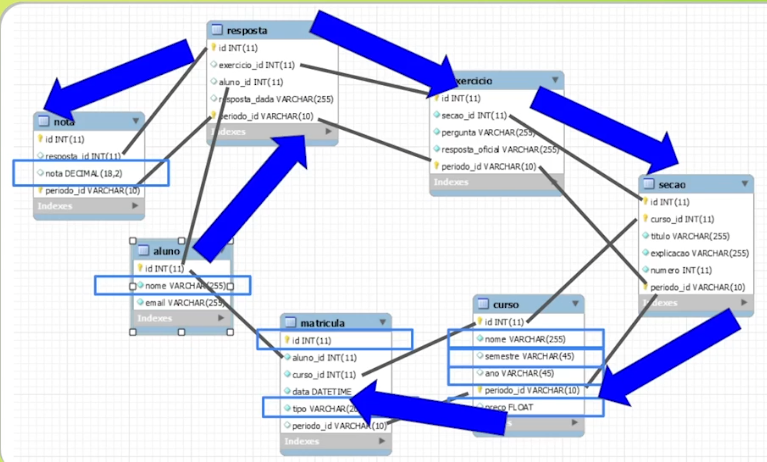

A maior parte destas transformações será de mesclagem de dados para a criação de uma única grande tabela.

1. Aluno
2. Resposta + Nota
3. Exercício
4. Secao
5. Curso
6. Matricula
7. Aluno (verificação)



**Alunos com respostas**

```sql
-- Nomes dos alunos
SELECT aluno.nome AS NOME_ALUNO 
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
```

```sql
-- ALUNO COM RESPOSTA
SELECT aluno.nome AS NOME_ALUNO 
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
ON aluno.id = resposta.aluno_id
WHERE resposta.periodo_id = '2010.1';
```

```sql
-- ALUNOS, RESPOSTA, NOTA
SELECT aluno.nome AS NOME_ALUNO, nota.nota as NOTA
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
WHERE resposta.periodo_id = '2010.1' AND nota.periodo_id = '2010.1';
```

* Qual o motivo de filtrar pelo periodo em reposta e nota?

```sql
-- ALUNO + RESPOSTA + EXERCÍCIO
SELECT aluno.nome AS NOME_ALUNO, nota.nota as NOTA
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.exercicio  exercicio
    ON reposta.exercicio_id = exercicio.id
    AND resposta.period_id = exercicio.period_id
WHERE resposta.periodo_id = '2010.1' 
    AND nota.periodo_id = '2010.1'
    AND exercicio.periodo_id = '2010.1';
```

```sql
-- ALUNO + RESPOSTA + EXERCÍCIO + SECAO
SELECT aluno.nome AS NOME_ALUNO, nota.nota as NOTA
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.exercicio  exercicio
    ON reposta.exercicio_id = exercicio.id
    AND resposta.period_id = exercicio.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.secao  secao
    ON exercicio.secao_id = secao.id
    AND exercicio.period_id = secao.period_id
WHERE resposta.periodo_id = '2010.1' 
    AND nota.periodo_id = '2010.1'
    AND exercicio.periodo_id = '2010.1'
    AND secao.period_id = '2010.1';
```

```sql
-- ALUNO + RESPOSTA + EXERCÍCIO + SECAO + CURSO
SELECT aluno.nome AS NOME_ALUNO,
    curso.nome AS NOME_CURSO, 
    curso.periodo_id AS PERIODO, 
    curso.semestre AS SEMESTRE, 
    curso.ano AS ANO, 
    curso.preco AS PRECO, 
    nota.nota as NOTA
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.exercicio  exercicio
    ON reposta.exercicio_id = exercicio.id
    AND resposta.period_id = exercicio.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.secao  secao
    ON exercicio.secao_id = secao.id
    AND exercicio.period_id = secao.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.curso  curso
    ON secao.curso_id = curso.id
    AND secao.period_id = curso.period_id
WHERE resposta.periodo_id = '2010.1' 
    AND nota.periodo_id = '2010.1'
    AND exercicio.periodo_id = '2010.1'
    AND secao.period_id = '2010.1'
    AND curso.period_id = '2010.1';
```

```sql
-- ALUNO + RESPOSTA + EXERCÍCIO + SECAO + CURSO + MATRICULA
SELECT aluno.nome AS NOME_ALUNO,
    curso.nome AS NOME_CURSO, 
    matricula.id AS MATRICULA_ID,
    matricula.tipo AS TIPO_PAGAMENTO
    curso.periodo_id AS PERIODO, 
    curso.semestre AS SEMESTRE, 
    curso.ano AS ANO, 
    curso.preco AS PRECO, 
    nota.nota as NOTA
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.exercicio  exercicio
    ON reposta.exercicio_id = exercicio.id
    AND resposta.period_id = exercicio.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.secao  secao
    ON exercicio.secao_id = secao.id
    AND exercicio.period_id = secao.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.curso  curso
    ON secao.curso_id = curso.id
    AND secao.period_id = curso.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.matricula  matricula
    ON curso.matricula_id = matricula.id
    AND curso.period_id = matricula.period_id
WHERE resposta.periodo_id = '2010.1' 
    AND nota.periodo_id = '2010.1'
    AND exercicio.periodo_id = '2010.1'
    AND secao.period_id = '2010.1'
    AND curso.period_id = '2010.1'
    AND matricula.periodo_id = '2010.1';
```


#### <font color=orange>3.c Transform: Síntese de agregação</font>

Esta etapa cosnsite em modificar a unidade de representação da tabela para a mais interessante para a atividade de gerenciamento. 

No case, cada registro representaria uma nota de uma questão. Mas seria mais proveitoso ter os registros de alunos por curso, com informações sobre eles, já resumindo as notas e outras dimensões.

* <font color=orange>AGRUPAMENTO</font>: definir chave de identificação dos registros (representação das linhas)
* <font color=orange>SUMARIO</font>: Definir critério de sumarização dos campos
    * Qual pergunta interessa responder no DW?

**Tabela desnormalizada**

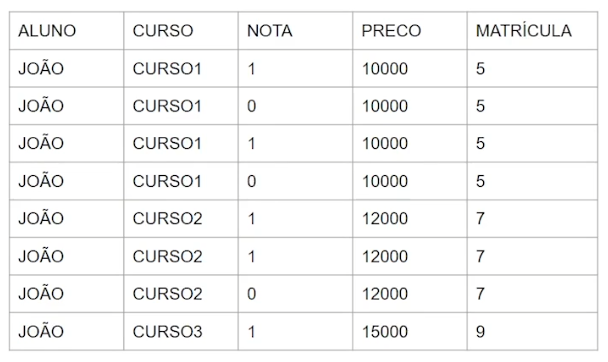

**Tabela final**

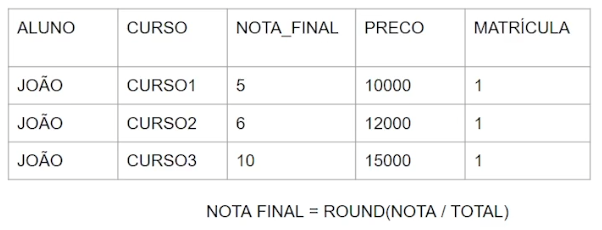

```sql
-- 
SELECT 
    count(distinct(matricula.id)) AS NUMERO_MATRICULAS,
    max(curso.preco) AS PRECO, 
    round((sum(nota.nota)/sum(1))*10) AS NOTA_FINAL

FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.exercicio  exercicio
    ON reposta.exercicio_id = exercicio.id
    AND resposta.period_id = exercicio.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.secao  secao
    ON exercicio.secao_id = secao.id
    AND exercicio.period_id = secao.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.curso  curso
    ON secao.curso_id = curso.id
    AND secao.period_id = curso.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.matricula  matricula
    ON curso.matricula_id = matricula.id
    AND curso.period_id = matricula.period_id
WHERE resposta.periodo_id = '2010.1' 
    AND nota.periodo_id = '2010.1'
    AND exercicio.periodo_id = '2010.1'
    AND secao.period_id = '2010.1'
    AND curso.period_id = '2010.1'
    AND matricula.periodo_id = '2010.1';

GROUP BY 
    aluno.nome,
    curso.nome, 
    matricula.tipo
    curso.periodo_id, 
    curso.semestre, 
    curso.ano;
```

* Definir as variáveis de indicadores sintéticos
* Definir os campos de identificação - características identitárias do registro

### <font color=orange>2. Consolidação do DW</font>

Para consluir a criação do DW será necessário criar a tabela que irá centralizar todos os dados de interesse para o processo gerencial.

Algumas estratégias podem ser tomadas para facilitar o processo de cargas baseado no período.

1. Criação da tabela DW
2. Carga dos dados no DW
    * Carga dos dados da consulta de ELT

#### <font color=orange>Criação da tabela de DW</font>

1. Criação da estrutura da tabela
2. Carga de dados

```sql
-- 1. CRIAÇÃO DA TABELA DW
DROP TABLE IF EXISTS `projeto-final-bq-ds-314501.BitbyteDW.bitbyte_dw`;

CREATE TABLE `projeto-final-bq-ds-314501.BitbyteDW.bitbyte_dw` (
  NOME_ALUNO STRING ,
  NOME_CURSO STRING ,
  TIPO_PAGAMENTO STRING,
  PERIODO STRING ,
  SEMESTRE STRING ,
  ANO STRING,
  PRECO FLOAT64 ,
  NUMERO_MATRICULAS INT64 ,
  NOTA_FINAL FLOAT64
) ;
```

```sql
-- 2. CARGA DOS DADOS
DELETE FROM `projeto-final-bq-ds-369013.BitbyteDW.bitbyte_dw`
    WHERE periodo_id = '2010.1';

-- CARGA DA CONSULTA
INSERT INTO `projeto-final-bq-ds-369013.BitbyteDW.bitbyte_dw`
SELECT 
    count(distinct(matricula.id)) AS NUMERO_MATRICULAS,
    max(curso.preco) AS PRECO, 
    round((sum(nota.nota)/sum(1))*10) AS NOTA_FINAL

FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.exercicio  exercicio
    ON reposta.exercicio_id = exercicio.id
    AND resposta.period_id = exercicio.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.secao  secao
    ON exercicio.secao_id = secao.id
    AND exercicio.period_id = secao.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.curso  curso
    ON secao.curso_id = curso.id
    AND secao.period_id = curso.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.matricula  matricula
    ON curso.matricula_id = matricula.id
    AND curso.period_id = matricula.period_id
WHERE resposta.periodo_id = '2010.1' 
    AND nota.periodo_id = '2010.1'
    AND exercicio.periodo_id = '2010.1'
    AND secao.period_id = '2010.1'
    AND curso.period_id = '2010.1'
    AND matricula.periodo_id = '2010.1';

GROUP BY 
    aluno.nome,
    curso.nome, 
    matricula.tipo
    curso.periodo_id, 
    curso.semestre, 
    curso.ano;
```

#### <font color=orange>Script único</font>

Para facilitar a alteração dos períodos trabalhados iremos colocar todo código em um único script, permitindo utilizar o `replace`.

Para isso, iremos juntar os scripts de:

* Carga das tabelas no Big Quey
* Carga dos dados na tabela de DW

```sql
-- 1. CARGA DOS DADOS NAS TABELAS
-- curso
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.curso`
    WHERE periodo_id = '2010.2';
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.curso`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM curso WHERE periodo_id = '2010.2';");

-- exercicio
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
    WHERE periodo_id = '2010.2';
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM exercicio WHERE periodo_id = '2010.2';");

-- matricula
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.matricula`
    WHERE periodo_id = '2010.2';
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.matricula`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM matricula WHERE periodo_id = '2010.2';");

-- nota
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.nota`
    WHERE periodo_id = '2010.2';
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.nota`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM nota WHERE periodo_id = '2010.2';");

-- resposta
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.resposta`
    WHERE periodo_id = '2010.2';
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.resposta`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM resposta WHERE periodo_id = '2010.2';");

-- secao
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.secao`
    WHERE periodo_id = '2010.2';
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.secao`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM secao WHERE periodo_id = '2010.2';");

-- aluno
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno` aluno
WHERE aluno.id IN (
    SELECT DISTINCT aluno_id 
    FROM `projeto-final-bq-ds-314501.BitbyteDW.matricula`
    WHERE periodo_id = '2010.2');
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.aluno` 
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT DISTINCT aluno.* FROM aluno INNER JOIN matricula ON aluno.id = matricula.aluno_id WHERE matricula.periodo_id = '2010.2';");

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.bitbyte_dw` WHERE PERIODO = '2010.2';
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.bitbyte_dw`
    SELECT 
aluno.nome AS NOME_ALUNO, curso.nome AS NOME_CURSO, matricula.tipo as TIPO_PAGAMENTO, 
curso.periodo_id AS PERIODO, curso.semestre AS SEMESTRE, curso.ano AS ANO, 
MAX(curso.preco) AS PRECO, COUNT(DISTINCT matricula.id) as NUMERO_MATRICULAS, 
ROUND((SUM(nota.nota)/SUM(1))*10) AS NOTA_FINAL
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno` aluno
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.resposta` resposta
ON aluno.id = resposta.aluno_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.nota` nota
ON resposta.id = nota.resposta_id AND resposta.periodo_id = nota.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.exercicio` exercicio 
ON exercicio.id = resposta.exercicio_id AND exercicio.periodo_id = resposta.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.secao` secao
ON secao.id = exercicio.secao_id AND secao.periodo_id = exercicio.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.curso` curso 
ON curso.id = secao.curso_id AND curso.periodo_id = secao.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.matricula` matricula 
ON curso.id = matricula.curso_id and curso.periodo_id = matricula.periodo_id
AND aluno.id = matricula.aluno_id
WHERE resposta.periodo_id = '2010.2' AND nota.periodo_id = '2010.2'
AND exercicio.periodo_id = '2010.2' AND secao.periodo_id = '2010.2'
AND curso.periodo_id = '2010.2' AND matricula.periodo_id = '2010.2'
GROUP BY 
aluno.nome, curso.nome, matricula.tipo , 
curso.periodo_id , curso.semestre, curso.ano;
```

#### <font color=orange>Parametrização</font>

Uma solução para ficilitar a operação de ELT baseado no período dos dados, podemos usar como referência da data de operação um dado em uma tabela no MySQL para servir de parâmetro.

No MySQL deve-se criar uma tabela para armazenar o dado do período a ser importado no DW.

```sql
-- MYSQL
DROP TABLE IF EXISTS parametro;
CREATE TABLE parametro
    (PERIODO VARCHAR(10));
INSERT INTO parametro VALUES ('2011.1');
```

Depois, no Google BigQuery temos que criar uma tabela stage. Com isso pode-se complementar o script único, sem ter que fazer mais alterações neste script, somente o dado do parâmetro no MySQL

```sql
-- Criar tabela de parâmetro no BigQuery e copiar o valor do MYSQL
DROP TABLE IF EXISTS `projeto-final-bq-ds-314501.BitbyteDW.parametro`
CREATE TABLE `projeto-final-bq-ds-314501.BitbyteDW.parametro`
    (PERIODO STRING);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.parametro`
    SELECT * FROM
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT PERIODO FROM parametro;");


-- Carga dos dados para a área de STAGE
-- 1. CARGA DOS DADOS NAS TABELAS
-- curso
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.curso`
    WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.curso`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM curso WHERE periodo_id = (SELECT PERIODO FROM parametro);");

-- exercicio
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
    WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM exercicio WHERE periodo_id = (SELECT PERIODO FROM parametro);");

-- matricula
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.matricula`
    WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.matricula`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM matricula WHERE periodo_id = (SELECT PERIODO FROM parametro);");

-- nota
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.nota`
    WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.nota`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM nota WHERE periodo_id = (SELECT PERIODO FROM parametro);");

-- resposta
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.resposta`
    WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.resposta`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM resposta WHERE periodo_id = (SELECT PERIODO FROM parametro);");

-- secao
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.secao`
    WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.secao`
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT * FROM secao WHERE periodo_id = (SELECT PERIODO FROM parametro);");

-- aluno
DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno` aluno
WHERE aluno.id IN (
    SELECT DISTINCT aluno_id 
    FROM `projeto-final-bq-ds-314501.BitbyteDW.matricula`
    WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`));
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.aluno` 
    SELECT * FROM 
    EXTERNAL_QUERY
    ("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
    "SELECT DISTINCT aluno.* FROM aluno INNER JOIN matricula ON aluno.id = matricula.aluno_id WHERE matricula.periodo_id = (SELECT PERIODO FROM parametro);");


-- 2. CARGA DOS DADOS 
DELETE FROM `projeto-final-bq-ds-369013.BitbyteDW.bitbyte_dw`
    WHERE PERIODO = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

-- CARGA DA CONSULTA
INSERT INTO `projeto-final-bq-ds-369013.BitbyteDW.bitbyte_dw`
SELECT 
    count(distinct(matricula.id)) AS NUMERO_MATRICULAS,
    max(curso.preco) AS PRECO, 
    round((sum(nota.nota)/sum(1))*10) AS NOTA_FINAL

FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno`  aluno
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.resposta  resposta
    ON aluno.id = resposta.aluno_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.nota  nota
    ON resposta.id = nota.resposta_id 
    AND resposta.period_id = nota.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.exercicio  exercicio
    ON reposta.exercicio_id = exercicio.id
    AND resposta.period_id = exercicio.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.secao  secao
    ON exercicio.secao_id = secao.id
    AND exercicio.period_id = secao.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.curso  curso
    ON secao.curso_id = curso.id
    AND secao.period_id = curso.period_id
INNER JOIN projeto-final-bq-ds-314501.BitbyteDW.matricula  matricula
    ON curso.matricula_id = matricula.id
    AND curso.period_id = matricula.period_id
WHERE resposta.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`) 
    AND nota.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
    AND exercicio.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
    AND secao.period_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
    AND curso.period_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
    AND matricula.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

GROUP BY 
    aluno.nome,
    curso.nome, 
    matricula.tipo
    curso.periodo_id, 
    curso.semestre, 
    curso.ano;
```

Código do instrutor

```sql
-- Criar a tabela de parametros no BIGQUERY e copiar seu valor do MYSQL

DROP TABLE IF EXISTS `projeto-final-bq-ds-314501.BitbyteDW.parametro`;
CREATE TABLE `projeto-final-bq-ds-314501.BitbyteDW.parametro`
(PERIODO STRING);
INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.parametro`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT PERIODO FROM parametro;");

-- Cargas das áreas de STAGE

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.curso`
WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.curso`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM curso WHERE periodo_id = (SELECT PERIODO FROM parametro);");

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.exercicio`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM exercicio WHERE periodo_id = (SELECT PERIODO FROM parametro);");

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.matricula`
WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.matricula`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM matricula WHERE periodo_id = (SELECT PERIODO FROM parametro);");

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.nota`
WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.nota`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM nota WHERE periodo_id = (SELECT PERIODO FROM parametro);");

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.resposta`
WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.resposta`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM resposta WHERE periodo_id = (SELECT PERIODO FROM parametro);");

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.secao`
WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.secao`
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT * FROM secao WHERE periodo_id = (SELECT PERIODO FROM parametro);");

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno` aluno
WHERE aluno.id IN (SELECT DISTINCT aluno_id FROM `projeto-final-bq-ds-314501.BitbyteDW.matricula`
WHERE periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`));

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.aluno` 
SELECT * FROM 
EXTERNAL_QUERY
("projects/projeto-final-bq-ds-314501/locations/southamerica-east1/connections/Banco-Bitbyte",
"SELECT DISTINCT aluno.* FROM aluno INNER JOIN matricula ON aluno.id = matricula.aluno_id WHERE matricula.periodo_id = (SELECT PERIODO FROM parametro);");

-- Cargas do Data Warehouse

DELETE FROM `projeto-final-bq-ds-314501.BitbyteDW.bitbyte_dw` 
WHERE PERIODO = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`);

INSERT INTO `projeto-final-bq-ds-314501.BitbyteDW.bitbyte_dw`
SELECT 
aluno.nome AS NOME_ALUNO, curso.nome AS NOME_CURSO, matricula.tipo as TIPO_PAGAMENTO, 
curso.periodo_id AS PERIODO, curso.semestre AS SEMESTRE, curso.ano AS ANO, 
MAX(curso.preco) AS PRECO, COUNT(DISTINCT matricula.id) as NUMERO_MATRICULAS, 
ROUND((SUM(nota.nota)/SUM(1))*10) AS NOTA_FINAL
FROM `projeto-final-bq-ds-314501.BitbyteDW.aluno` aluno
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.resposta` resposta
ON aluno.id = resposta.aluno_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.nota` nota
ON resposta.id = nota.resposta_id AND resposta.periodo_id = nota.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.exercicio` exercicio 
ON exercicio.id = resposta.exercicio_id AND exercicio.periodo_id = resposta.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.secao` secao
ON secao.id = exercicio.secao_id AND secao.periodo_id = exercicio.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.curso` curso 
ON curso.id = secao.curso_id AND curso.periodo_id = secao.periodo_id
INNER JOIN `projeto-final-bq-ds-314501.BitbyteDW.matricula` matricula 
ON curso.id = matricula.curso_id and curso.periodo_id = matricula.periodo_id
AND aluno.id = matricula.aluno_id
WHERE resposta.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
AND nota.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
AND exercicio.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
AND secao.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
AND curso.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`) 
AND matricula.periodo_id = (SELECT PERIODO FROM `projeto-final-bq-ds-314501.BitbyteDW.parametro`)
GROUP BY 
aluno.nome, curso.nome, matricula.tipo , 
curso.periodo_id , curso.semestre, curso.ano;
```